# Disclaimer
The aim of this exercise is to show you a little bit what is possible with web scraping and give you a chance to familiarize yourself with jupyter notebooks and python syntax. This however does NOT mean that we expect you to know how all of this works by the end of this - you will go through all of this in a lot more depth during your courses this semester.


Also, if you are already familiar with programming - please help your colleagues! 

# Installing Packages

To know core Python is powerful in itself, but the great potentials lie in the huge community of developers and researchers contributing to a shared pool of software packages. A programming language is as powerful as the community that surrounds it. Especially in the field of machine learning, the Python community is leading the way, allowing you to share code with top researchers from the field and industry, among others Google’s top engineering teams. Tapping into these vast resources is made easy by the Conda distribution and the pip package manager. Just open your shell/command-line/terminal and type the following: conda install [name of package]

or if conda does not support it directly use the more generic package manager: pip install [name of package]

To be able to run this program, we need to install the wordcloud package. You install this by going to the anaconda prompt and write >> conda install [package name]

You need to reopen everything once you did that! 

# Scraping Exercise

Once you have installed a package in Anaconda, you can use it in any program you write. To do so, however, you will need to import the package at the beginning of your program as we are doing in the next cell.

In [1]:
import pandas as pd # pandas is a package that makes it easier to deal with dataframes
import tqdm # this package allows us to show you a progress bar while the program is running
from wordcloud import WordCloud, STOPWORDS # Need an install! -> we will make use of this to make some nice visulasations
import matplotlib.pyplot as plt # matplotlib is python's standard package for data plotting
import seaborn as sns # seaborn will make your plots prettier
from scraping_functions import * # we have prepared some functions in a separate file that will make your life easier which we are importing here
%matplotlib inline # this tells jupyter notebook to output any plots in the notebook cells

UsageError: unrecognized arguments: # this tells jupyter notebook to output any plots in the notebook cells


## Exercise: Scrape Some Recipes

For this exercise we will scrape recipes from [allrecipes.com](https://www.allrecipes.com/). Specifically we want to know the title, the summary, the rating and the number of reviews of a set of recipes.

To do so, first - as a group - decide on an ingredient (e.g. chocolate, carrots, apples) or a dish (e.g. pasta, pizza) that you want to work with for this exercise.

Then set the below query equal to your chosen word (remember to put it in ' ') and execute the cell.

In [2]:
query =  # fill in yourself

#Scrape the recipes
# scrape_recipes is a function that we have built to extract recipes from allrecipes.com
# you can find the source code in the file called 'scraping_functions.py'
# you will learn how to write such functions yourself during the upcoming semester
results, count = scrape_recipes(query)

100%|██████████| 25/25 [00:38<00:00,  1.54s/it]


Now let's look at how many entries we have found and what we have scraped.

In [6]:
# print the results and the number of results
print(count)
print(results)

662
['            <div class="component card card__recipe card__facetedSearchResult"\n              \n               role="listitem"\n            >\n              <div class="card__imageContainer">\n                <a class="card__titleLink manual-link-behavior elementFont__title margin-8-bottom"\n                  href="https://www.allrecipes.com/recipe/21528/pesto-pizza/"\n                  title="Pesto Pizza"\n                  aria-hidden="true"\n                  tabindex="-1"\n                  \n          >\n          \n                      <div class="component lazy-image lazy-image-udf aspect_1x1" data-src="https://imagesvc.meredithcorp.io/v3/mm/image?url&#x3D;https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F43%2F2022%2F07%2F11%2F21528-Pesto-Pizza-dabblingdiva_5423214_original-1x1-1.jpg"\n                         data-special-crop="" data-alt="Pesto Pizza on pizza peel" data-title="21528-Pesto-Pizza-dabblingdiva_5423214_original-1x1" data-shop-image="false" dat

Still looks a bit messy...
This is basically the html code that produces this website - we still have to do some work to get the content out of this. To do so, we need to find certain identifiers that will tell our parser what information to extract. 

Let's take a look at the website to figure this out.

Go to [allrecipes.com](https://www.allrecipes.com/) and type in your search term.
On the results page, mark the title of one of the recipes then click right on your mouse and chose 'Inspect'.

Do the same for the summary blob, the rating and the rating count. 

We now need to tell our parser the specific identifiers for each variable. We have already filled those in for title, summary and rating. Can you do it for the rating count?

In [3]:
variables = {'title':'h3 class="card__title"', 
             'rating_count': #insert yourself,
             'summary': 'div class="card__summary"',
             'rating':'span class="review-star-text"'}


# parse_results
data = [] 
for res in tqdm.tqdm(results):
    data += get_recipes(res,variables)


# load into dataframe
df = pd.DataFrame(data).drop_duplicates()

100%|██████████| 25/25 [00:01<00:00, 20.28it/s]


Congratulations if all went well you have now downloaded some data and put it into a dataframe. 

### Exercise: Now we want to see how the data looks! To do this, follow these steps: 
1 Make a "code" cell

2 Now write: df.head(10) 

> Explainer: In the above cell we named the dataset we just downloaded 'df'. The '.head()' part calls a function to showcase the first lines of the dataframe. '10' means in this case that we want to get the first 10 lines. You could also exchange this number by e.g. 20 to get the first 20 lines of data.

3 Run it

In [7]:
df.head(10)

title rating_count  \
0              Pesto Pizza          207   
1             Hummus Pizza          264   
2      Gourmet White Pizza          133   
3         Chunky Pizza Dip            9   
4       Bakery-Style Pizza           13   
5     Yummy Pizza Cupcakes            1   
6  Easy Cheeseburger Pizza            5   
7     Chicken Garlic Pizza          308   
8  Valentino's Pizza Crust          854   
9              Pizza Crust         1488   

                                             summary             rating  \
0         A great alternative to your regular pizza.  Rating: 4.5 stars   
1  This pizza uses hummus instead of the usual re...  Rating: 4.5 stars   
2  Yummy! This is a wonderful pizza for those who...  Rating: 4.5 stars   
3  Chunky Pizza Dip is a healthy alternative to p...    Rating: 4 stars   
4  Now found exclusively at one well-known pizza ...    Rating: 5 stars   
5  All the yummy things in pizza rolled in with a...    Rating: 4 stars   
6  The taste of a cheeseburger in pizza form! Opt...  Rating: 4.5 stars   
7  A delicious option for homemade pizza! Butter ...  Rating: 4.5 stars   
8  This is an excellent pizza crust recipe. I hav...  Rating: 4.5 stars   
9  A friend gave me this recipe for pizza dough. ...  Rating: 4.5 stars   

                                author_link  
0  https://www.allrecipes.com/cook/25333528  
1    https://www.allrecipes.com/cook/854328  
2   https://www.allrecipes.com/cook/1350998  
3  https://www.allrecipes.com/cook/25333528  
4   https://www.allrecipes.com/cook/1054003  
5  https://www.allrecipes.com/cook/14044718  
6   https://www.allrecipes.com/cook/1699760  
7   https://www.allrecipes.com/cook/1538234  
8  https://www.allrecipes.com/cook/24324484  
9    https://www.allrecipes.com/cook/203034

Pandas - the package we imported to make it easier for us to work with dataframes - has some functions available that allow you to easily get some information about the data you are working with. First, and foremost we can write the name of our dataframe and then '.shape' to get information about the dimensions of our data.

How many rows do you have in your dataframe?

In [8]:
df.shape

(587, 5)

We can also only look at specific columns, by written the dataframe's name followed by '.columnname'. Like in the example below.

In [11]:
df.title

0                                       Pesto Pizza
1                                      Hummus Pizza
2                               Gourmet White Pizza
3                                  Chunky Pizza Dip
4                                Bakery-Style Pizza
                           ...                     
595                      Hawaiian-Style Quesadillas
596                                     Pizzadillas
597               Air Fryer Ranch-Breaded Mushrooms
598    Scacce Ragusane (Sicilian Stuffed Flatbread)
599                      Ground Beef Taco Flatbread
Name: title, Length: 587, dtype: object

If you now take a look at the actual webpage and compare the dimensions of your dataframe to the listed search results, you might find that your dataframe does not contain all search results. We won't be too concerned with why this happened now, but when you are using scraping for scientific purposes (or any 'serious' purpose), it is very important to look thoroughly into missing data.

### Exercise: Compare scraped data with manual inspection of website

Each row in the dataframe above corresponds to a recipe containing the word "carrots". Go to  [allrecipes.com](https://www.allrecipes.com/)  and search for "carrots" in the search box. Compare the results on the website with the dataframe above. How has the information on the website been mapped to the rows and columns in the dataframe?

### Exercise: Make a Word Cloud

A Word Cloud is a visualization of the most frequent words in a text corpus. The larger words are more frequent. 

We will now generate such a word cloud from all the recipes that we have scraped. The function below will collect all words included in a recipe title from our data frame into one long string.

In [9]:
title_words = get_title_words(df)
title_words

'pesto pizza hummus pizza gourmet white pizza chunky pizza dip bakery-style pizza easy cheeseburger pizza yummy pizza cupcakes valentino\'s pizza crust chicken garlic pizza pizza crust pizza on the grill ii pear and prosciutto pizza crescent pizza pockets quick pizza sauce authentic pizza margherita homemade pepperoni pizza chicken florentine pizza pizza pasta no-yeast pizza crust sicilian pizza crust breakfast pizza easy pizza sauce easy pizza in a pinch easy homemade pizza dough smoked salmon pizza pizza meat loaf basic pizza dough easy flatbread pizza jan\'s loaded pizza fries white pizza sauce valentine pizza potato pizza blaine pizza sauce cajun boudin pizza chili pizza from hormel® breaded zucchini pizza bites dessert pizza detroit-style pizza pizza cupcakes from scratch bbq pork pizza veggie pita pizza five-cheese pizza cupcakes pizza without the red sauce tuna pizza buffalo-style pizza gourmet chicken pizza reuben pizza the best pizza sauce classic pizza margherita pizza oven d

Obviously, your search term will be the most frequent one on the list - however we want to get rid of it as this is not particularly interesting. Also there might be some so-called 'stopwords' like 'and' or 'or' in the list which we are not particularly interested in. The wordcloud package provides a list of common stopwords that we can use. However, we will need to update it and add the name of your search term.

In [ ]:
# load the predefined stopwords from the wordcloud package
stopwords = set(STOPWORDS)

# add your search term in the brackets to the list of stopwords
# don't forgot to use ""
stopwords.update([]) #Fill in here

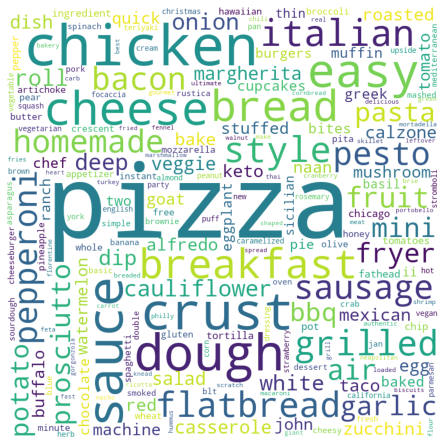

In [11]:

# this function by the wordcloud package generates a wordcloud 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                collocations = False,
                min_font_size = 10).generate(title_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 


Is the outcome as you would have expected? Are there any 'big' terms that you think don't really make sense? Any idea why they could be there?

You can also play around with the variables that the Wordcloud Function gets - adjust e.g. width, height or background color.

### Exercise: Make numeric variable from text data

 The "rating" column contains text, as seen below:
 
 We want to extract the actual rating from this text and store it as a numeric variable. This is done by the code below:

In [12]:
df.rating

0      Rating: 4.5 stars
1      Rating: 4.5 stars
2      Rating: 4.5 stars
3        Rating: 4 stars
4        Rating: 5 stars
             ...        
595    Rating: 4.5 stars
596    Rating: 4.5 stars
597    Rating: 4.5 stars
598      Rating: 5 stars
599                  NaN
Name: rating, Length: 589, dtype: object

In [14]:
# this line takes the whol rating column and replaces the phrase 'Rating: ' by an empty string
df["rating"] = df["rating"].str.replace("Rating: ", "")
# here we do the same an remove the word 'stars' in each entry
df["rating"] = df["rating"].str.replace(" stars", "")
# now finally we can convert the rating from a string to a float (i.e. a number)
df["rating"] = df["rating"].astype(float)

 Now the "rating" column just contains the rating, have a look:

In [15]:
df.head()

title rating_count  \
0          Pesto Pizza          207   
1         Hummus Pizza          264   
2  Gourmet White Pizza          133   
3     Chunky Pizza Dip            9   
4   Bakery-Style Pizza           13   

                                             summary  rating  \
0         A great alternative to your regular pizza.     4.5   
1  This pizza uses hummus instead of the usual re...     4.5   
2  Yummy! This is a wonderful pizza for those who...     4.5   
3  Chunky Pizza Dip is a healthy alternative to p...     4.0   
4  Now found exclusively at one well-known pizza ...     5.0   

                                author_link  
0  https://www.allrecipes.com/cook/25333528  
1    https://www.allrecipes.com/cook/854328  
2   https://www.allrecipes.com/cook/1350998  
3  https://www.allrecipes.com/cook/25333528  
4   https://www.allrecipes.com/cook/1054003

and it is a decimal variable (aka. "float"), as seen by the command below:

In [16]:
df.dtypes

title            object
rating_count     object
summary          object
rating          float64
author_link      object
dtype: object

This command also reveals that "rating_count" is stored as a string. Let's turn it into a decimal variable (a "float"). Note that a counting variable (aka. an "integer") would make more sense, but some technical details make floats easier to use here. Follow the code from above to turn rating_count into a float variable. 

In [85]:
# FILL IN YOURSELF

Now check if it worked:

In [86]:
df.dtypes

title            object
rating_count    float64
summary          object
rating          float64
author_link      object
dtype: object

### Exercise: Make scatter plot of ratings vs rating counts

Now that "rating" and "rating_count" are stored as numeric variables, we can visualize their distributions with histograms and a scatter plot. 

Lets start out with a scatterplot that shows the rating (the stars) against how many times it has been rated.

For this we are using the plotting library seaborn which we imported in the beginning as 'sns'. To create a scatterplot we thus need to call sns.scatterplot.
We pass it the data (our dataframe, df), the x-variable ('rating'), the y-variable ('rating_count') and a parameter to specify the transparencey of the dots (alpha)

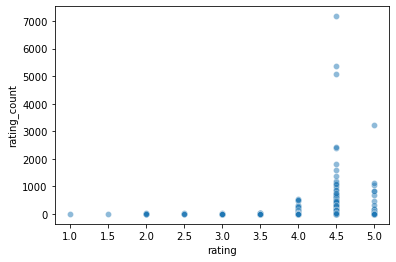

In [87]:
sns.scatterplot(data=df,x='rating',y='rating_count', alpha=0.5);

You can also change the color of the dots in the scatterplot. Choose a color to your liking and fill it in below.

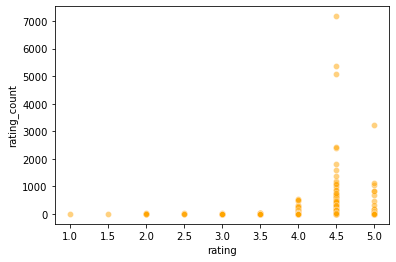

In [88]:
sns.scatterplot(data=df,x='rating',y='rating_count', alpha=0.5, color= 'FILL IN HERE');

We can also easily plot a histogram of the rating.

<AxesSubplot:xlabel='rating', ylabel='Count'>

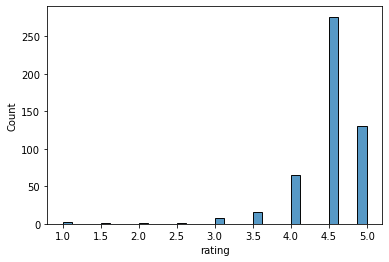

In [17]:
sns.histplot(data=df,x='rating')

Further we can combine multiple plots into one output. For this we create a figure with multiple axes and then assign each plot to an axis.
Let's combine a histogram of rating, a histogram of rating count and our scatterplot.

Fill in the code for the histogram of the rating count yourself.

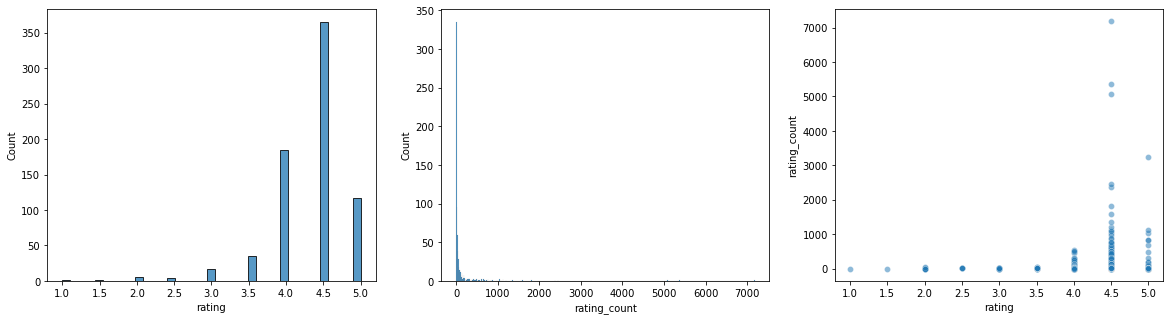

In [90]:
fig, axs = plt.subplots(1,3,figsize=(20,5))
sns.histplot(data=df,x='rating',ax=axs[0])
# code for the histogram of rating count - FILL IN
sns.scatterplot(data=df,x='rating',y='rating_count', alpha=0.5, ax=axs[2]);

 We see that the histogram for _rating_count_ and the scatterplot are not very informative due to the outliers in the distribution of _rating_count_. Below we visualize the distributions for _rating_ between 3 and 5, and _rating_count_ between 1 and 1000.

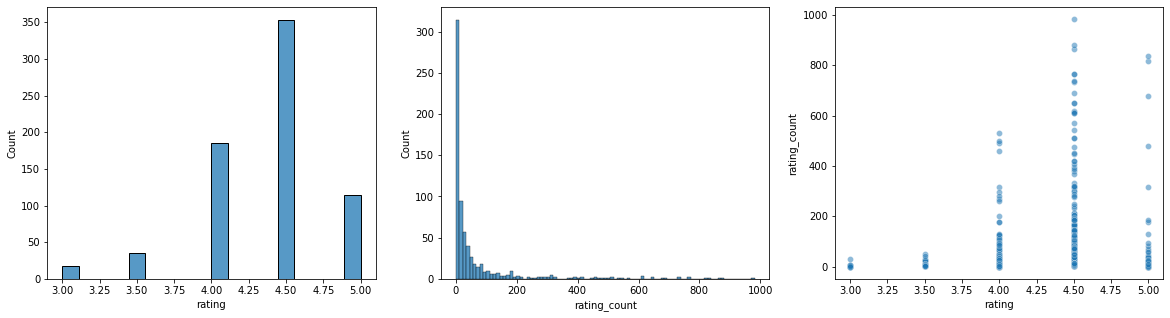

In [91]:
df_restricted = df[(3<=df['rating'])&(df['rating_count']<=1000)]
fig, axs = plt.subplots(1,3,figsize=(20,5))
sns.histplot(data=df_restricted,x='rating',ax=axs[0])
sns.histplot(data=df_restricted,x='rating_count',ax=axs[1])
sns.scatterplot(data=df_restricted,x='rating',y='rating_count', alpha=0.5, ax=axs[2]);

### Exercise: Make a different restriction: You choose how! 

### What insights about the distributions of _rating_ and _rating_count_ do you get from inspecting the plots above?

### Exercise: Store the data on your machine

In the following step we assign a directory path to tell where to save a file. You need to assign your own path. More specifically, you need to exchange "C:/Users/qtk365/Dropbox/Postdoc/Teaching/Intro-data-sprint/Data/" with the path to the folder on your computer, where you want to store the data.

HINT 1: You can open your computers "file explorer" and manually determine where you want to store the data. Now copy the file path into your code below. 

HINT 2: Beware of forward slashes and double quotes!

HINT 3: If you cannot make it work, then just leave the path empty (path = "") and the data will be stored in the folder, where your notebook is stored.

In [93]:
path = "/Users/htr365/Documents/Introweek2022/" # CHANGE HERE 
filename = "recipes_carrots"

df.to_csv(path+filename+'.csv',index=False)

### Go into the folder, where you have stored your data and confirm that the data is in there.

# Congratulations!


You have made it through your first scraping exercise! In the upcoming semester you will learn how to implement all of this on your own.

If you still have time - get creative? What else is it that you can explore with this dataset? Or try choosing another search term and see what you get!